# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./Traffic_sign_classiffier_data/train.p"
validation_file = "./Traffic_sign_classiffier_data/valid.p"
testing_file = "./Traffic_sign_classiffier_data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('DONE')

DONE


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
#print(X_train.shape)
n_train = X_train.shape[0]

# TODO: Number of validation examples
#print(X_valid.shape)
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
#print(X_test.shape)
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
#print(X_train[0].shape)
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
#print(y_train.shape)
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

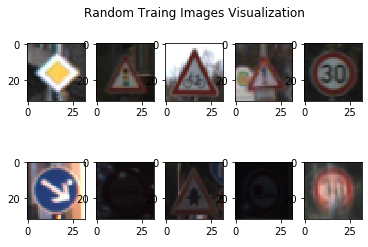

In [5]:
import random
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

fig = plt.figure()
plt.title('Random Traing Images Visualization')
plt.axis('off')
training_image_column = 5
training_image_row = 2
for i in range(1, 11):
    random_picture = random.randint(0, n_train)
    image = X_train[random_picture]

    fig.add_subplot(training_image_row, training_image_column, i)

    plt.imshow(image)
    plt.savefig('Random_Traing_Images_Visualization.jpg')


In [6]:
#Turn label np.array to general list
y_train_list = y_train.tolist()
#print(y_train_list)

#Turn list into a dictionary with each key is each unique label and the value is how many instances of that label there are
training_my_dict = {i:y_train_list.count(i) for i in y_train_list}

In [7]:
#Turn label np.array to general list
y_test_list = y_test.tolist()    #y_train.tolist()
#Turn list into a dictionary with each key is each unique label and the value is how many instances of that label there are
test_label_dict = {i:y_test_list.count(i) for i in y_test_list}

In [8]:
#Turn label np.array to general list
y_valid_list = y_valid.tolist()
#Turn list into a dictionary with each key is each unique label and the value is how many instances of that label there are
valid_label_dict = {i:y_valid_list.count(i) for i in y_valid_list}

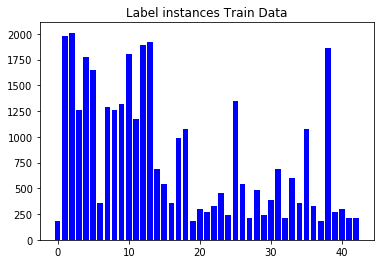

In [9]:
#Trainging data histogram
plt.bar(training_my_dict.keys(), training_my_dict.values(), color='b')
plt.title("Label instances Train Data")
#plt.grid()
plt.savefig('Label instances Training Data')
plt.show()

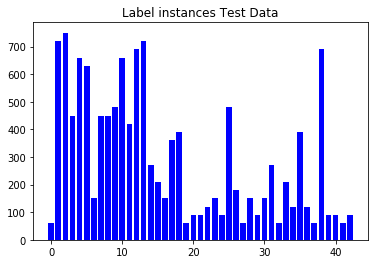

In [10]:
plt.bar(test_label_dict.keys(), test_label_dict.values(), color='b')
plt.title("Label instances Test Data")
#plt.grid()
plt.savefig('Label instances Test Data')
plt.show()

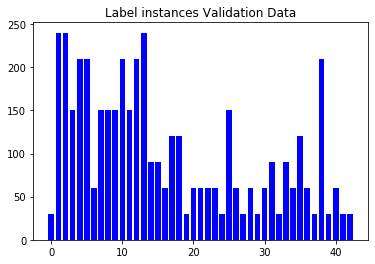

In [11]:
plt.bar(valid_label_dict.keys(), valid_label_dict.values(), color='b')
plt.title("Label instances Validation Data")
#plt.grid()
plt.savefig('Label instances Validation Data')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def Process(X_images):
    #grayscale
    grayscaled = np.sum(X_images/3, axis = 3, keepdims = True)
    #normalize
    normalized = (grayscaled - 128) / 128
    
    return normalized

X_train_processed = Process(X_train)
X_test_processed = Process(X_test)
X_valid_processed = Process(X_valid)

In [13]:
print('Regular training data size '+ str(X_train.shape))
print('Processed training data size ' + str(X_train_processed.shape))
print('')
print('Regular test data size '+ str(X_test.shape))
print('Processed test data size ' + str(X_test_processed.shape))

Regular training data size (34799, 32, 32, 3)
Processed training data size (34799, 32, 32, 1)

Regular test data size (12630, 32, 32, 3)
Processed test data size (12630, 32, 32, 1)


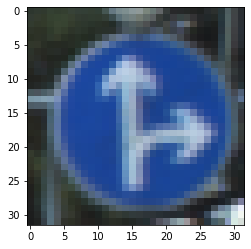

In [14]:
image_number = 1220
ri = X_train[image_number]

plt.imshow(ri)
plt.savefig('Before_process.jpg')

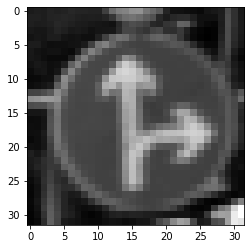

In [15]:
rip = X_train_processed[image_number]

plt.imshow(rip.squeeze(), cmap = 'gray')
plt.savefig('After_process.jpg')

### Model Architecture

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

"""
Mostly based on LeNet
Architecture¶
Layer 1: Convolutional. The output shape should be 28x28x6.

Activation using relu.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation using relu.

Pooling. The output shape should be 5x5x16.

Flatten output should be 400.

Layer 3: Fully Connected. This should have 120 outputs.

Activation using relu.

Dropout.

Layer 4: Fully Connected. This should have 84 outputs.

Activation using relu.

Layer 5: Fully Connected (Logits). This should have 43 outputs.
"""

'\nMostly based on LeNet\nArchitecture¶\nLayer 1: Convolutional. The output shape should be 28x28x6.\n\nActivation using relu.\n\nPooling. The output shape should be 14x14x6.\n\nLayer 2: Convolutional. The output shape should be 10x10x16.\n\nActivation using relu.\n\nPooling. The output shape should be 5x5x16.\n\nFlatten output should be 400.\n\nLayer 3: Fully Connected. This should have 120 outputs.\n\nActivation using relu.\n\nDropout.\n\nLayer 4: Fully Connected. This should have 84 outputs.\n\nActivation using relu.\n\nLayer 5: Fully Connected (Logits). This should have 43 outputs.\n'

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet_mod(x):
    mu = 0
    sigma = 0.1
    #____________________________________________________________________________________________________
    #Layer 1: Convolutional layer. Input = 32x32x1. Output = 28x28x6
    
    #Initialize the Weights and biased
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    
    conv1 = tf.nn.conv2d(x,conv1_W, strides = [1, 1, 1, 1], padding = 'VALID') + conv1_b
    #print('shape after layer 1 ' + str(conv1.shape))
    
    #Activation cunction relu
    conv1 = tf.nn.relu(conv1)
    
    #Pooling. The output shape should be 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    #print('shape after first pool ' + str(conv1.shape))
    #____________________________________________________________________________________________________
    #Layer 2: Convolutional. The output shape should be 10x10x16.
    
    #Initialize Weights and Biased
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1, 1, 1, 1], padding = 'VALID') + conv2_b
    #print('shape after layer 2 ' + str(conv2.shape))
    
    #Activation relu
    conv2 = tf.nn.relu(conv2)
    
    #Pooling. The output shape should be 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    #print('shape after pool 2 ' + str(conv2.shape))
    
    #Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.
    #Output should be 400
    fc0 = flatten(conv2)
    fc0 = tf.nn.dropout(fc0, keep_prob)
    #print('shape after flatten 1 ' + str(flat0.shape))
    #____________________________________________________________________________________________________
    #Layer 3: Fully Connected. This should have 120 outputs.
    fc1_W = tf.Variable(tf.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    #print('shape after flatten 1 ' + str(fc1.shape))
    
    #Activation. Your choice of activation function.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    #____________________________________________________________________________________________________
    #Layer 4: Fully Connected. This should have 84 outputs.
    fc2_W = tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    #print(fc2.shape)
    #Activation. Your choice of activation function.
    fc2 = tf.nn.relu(fc2)
    
    #____________________________________________________________________________________________________
    #Layer 5: Fully Connected (Logits). This should have 43 outputs.
    fc3_W = tf.Variable(tf.truncated_normal(shape = (84, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    #print(fc3.shape)
    logits = fc3
    
    return logits

/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/hom

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [28]:
EPOCHS = 50
BATCH_SIZE = 128

In [29]:
#Features and labels
keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [30]:
#Training Pipeline
rate = 0.0009
keep_prob = tf.placeholder(tf.float32)
logits = LeNet_mod(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [31]:
#Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [21]:
from sklearn.utils import shuffle
X_train = X_train_processed
X_valid = X_valid_processed

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        test_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Models/lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Test Accuracy = 0.489
Validation Accuracy = 0.430

EPOCH 2 ...
Test Accuracy = 0.798
Validation Accuracy = 0.762

EPOCH 3 ...
Test Accuracy = 0.875
Validation Accuracy = 0.831

EPOCH 4 ...
Test Accuracy = 0.917
Validation Accuracy = 0.874

EPOCH 5 ...
Test Accuracy = 0.927
Validation Accuracy = 0.883

EPOCH 6 ...
Test Accuracy = 0.947
Validation Accuracy = 0.903

EPOCH 7 ...
Test Accuracy = 0.954
Validation Accuracy = 0.915

EPOCH 8 ...
Test Accuracy = 0.959
Validation Accuracy = 0.912

EPOCH 9 ...
Test Accuracy = 0.962
Validation Accuracy = 0.914

EPOCH 10 ...
Test Accuracy = 0.967
Validation Accuracy = 0.918

EPOCH 11 ...
Test Accuracy = 0.973
Validation Accuracy = 0.929

EPOCH 12 ...
Test Accuracy = 0.975
Validation Accuracy = 0.932

EPOCH 13 ...
Test Accuracy = 0.976
Validation Accuracy = 0.936

EPOCH 14 ...
Test Accuracy = 0.977
Validation Accuracy = 0.939

EPOCH 15 ...
Test Accuracy = 0.978
Validation Accuracy = 0.940

EPOCH 16 ...
Test Accuracy = 0.982
V

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [36]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#Read files in german traffic sign folder 
import glob
import os

german_sign_list = glob.glob('./Other_german_traffic_signs/*.jpg')
#print(german_sign_list[0])

#Assing correct label to each image
german_list_label = {}
german_list_label['Speed_limit_30.jpg']=1
german_list_label['Speed_limit_50.jpg']=2
german_list_label['Speed_limit_70.jpg']=4
german_list_label['EndOfAllSpeedAndPassingLimits.jpg']=32
german_list_label['No_entry.jpg']=17
german_list_label['Priority_road.jpg']=12
german_list_label['Stop.jpg']=14
german_list_label['Yield.jpg']=13
german_list_label['Traffic_light.jpg']=26

#print(german_list_label)

In [37]:
#Resize images to standard 32x32 pixels
from PIL import Image
german_sign_resized = []
for image in german_sign_list:
    img = Image.open(image)
    img = img.resize((32,32))
    img = np.asarray(img)
    german_sign_resized.append(img)
    #print(image)


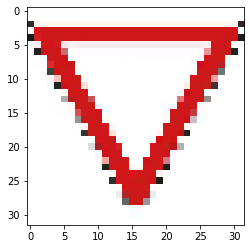

In [38]:
plt.imshow(german_sign_resized[0])
plt.show()

In [39]:
print(len(german_sign_resized))

9


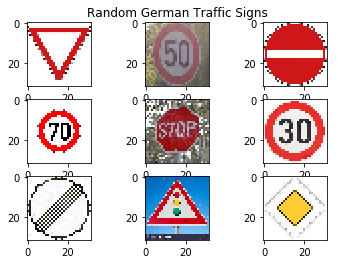

In [40]:
fig = plt.figure()
plt.title('Random German Traffic Signs')
plt.axis('off')
training_image_column = 3
training_image_row = 3
for i in range(len(german_sign_resized)):
    
    image = german_sign_resized[i]

    fig.add_subplot(training_image_row, training_image_column, i+1)

    plt.imshow(image)
    
plt.savefig('German_Traffic_Signs')


In [41]:
german_sign_labels = [12, 32, 4, 13, 14, 17, 26, 2, 1]

In [42]:
german_sign_resized = np.array(german_sign_resized)
print(german_sign_resized.shape)

(9, 32, 32, 3)


In [43]:
#Process the data
Processed_german_signs = Process(german_sign_resized)

In [44]:
print(Processed_german_signs.shape)

(9, 32, 32, 1)


### Predict the Sign Type for Each Image

In [45]:
def predict(features):
    with tf.Session() as sess:
        saver.restore(sess, './Models/lenet')
        results = sess.run(tf.argmax(logits, 1), {x : features, keep_prob:1.0})
        #print(results[0])
        return results

In [46]:
predict(Processed_german_signs)

INFO:tensorflow:Restoring parameters from ./Models/lenet


array([13,  1, 17,  4, 14,  1, 32, 31, 12])

In [47]:
with tf.Session() as sess:
    saver.restore(sess, './Models/lenet')
    results = sess.run(tf.argmax(logits, 1), {x : Processed_german_signs, keep_prob:1.0})

INFO:tensorflow:Restoring parameters from ./Models/lenet


### Analyze Performance

In [221]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
right = 0
for i, label in enumerate(german_list_label):
    print('............................................................................')
    #print(label)
    print('Real is       ' + str(german_sign_labels[i]))
    print('Prediction is ' + str(results[i]))
    if german_sign_labels[i] == results[i]:
        print('RIGHT+++++++++++++++++++++')
        right += 1
    else:
        print('WRONG---------------------')

............................................................................
Real is       12
Prediction is 12
RIGHT+++++++++++++++++++++
............................................................................
Real is       32
Prediction is 32
RIGHT+++++++++++++++++++++
............................................................................
Real is       4
Prediction is 4
RIGHT+++++++++++++++++++++
............................................................................
Real is       13
Prediction is 13
RIGHT+++++++++++++++++++++
............................................................................
Real is       14
Prediction is 14
RIGHT+++++++++++++++++++++
............................................................................
Real is       17
Prediction is 17
RIGHT+++++++++++++++++++++
............................................................................
Real is       26
Prediction is 31
WRONG---------------------
....................................

In [222]:
print(str(right) + ' right')
total = len(german_list_label)
accuracy = right / total * 100
print('Accuracy is '+ str(accuracy) + '%')

7 right
Accuracy is 77.77777777777779%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [49]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './Models/lenet')
    top_5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits),5), feed_dict={x: Processed_german_signs, keep_prob : 1.0})
    
#print(top_5)
#print(top_5[0][1])


for i in range(0,len(german_list_label)):
    print('Image ' + str(i) + ' '+ str(top_5[0][i]))

INFO:tensorflow:Restoring parameters from ./lenet


NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./lenet
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]

Caused by op 'save/RestoreV2_1', defined at:
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/edwin/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/edwin/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/edwin/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/home/edwin/.local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/asyncio/base_events.py", line 427, in run_forever
    self._run_once()
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/asyncio/base_events.py", line 1440, in _run_once
    handle._run()
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/edwin/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/edwin/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/edwin/.local/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/edwin/.local/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/edwin/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/edwin/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/edwin/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/edwin/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/edwin/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/home/edwin/.local/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/edwin/.local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/edwin/.local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/edwin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/edwin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/home/edwin/.local/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/edwin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/edwin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/edwin/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-89d4d7961150>", line 4, in <module>
    saver = tf.train.Saver()
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1140, in __init__
    self.build()
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1172, in build
    filename=self._filename)
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 688, in build
    restore_sequentially, reshape)
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 663, in restore_v2
    dtypes=dtypes, name=name)
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/edwin/anaconda2/envs/TrafficSignClassifier/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./lenet
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [199]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")